<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

/var/folders/w1/0cvf366x2_d02lvvx5d15qrw0000gp/T/ipykernel_6405/1631229706.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
import requests
import io

URL ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

resp = requests.get(URL)
content = resp.content
boston_df = pd.read_csv(io.StringIO(content.decode('utf-8')))

# Task2: Generate Descriptive Statistics and Visualizations

### 2.1. Boxplot of Median Value of Owner-Occupied Homes (MEDV)

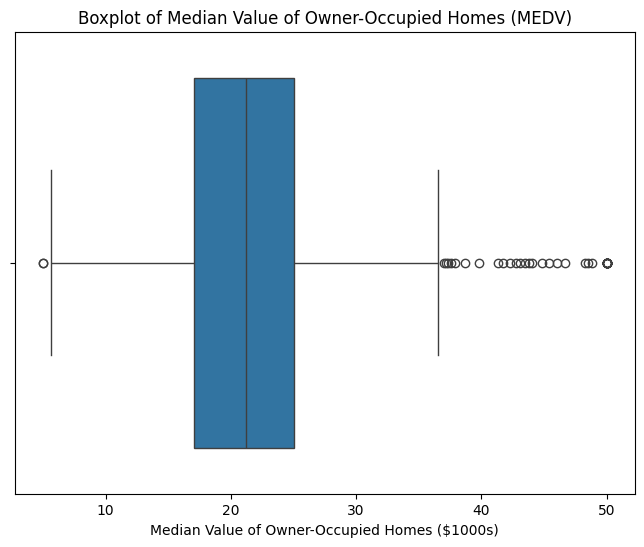

In [4]:
pyplot.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
pyplot.xlabel('Median Value of Owner-Occupied Homes ($1000s)')
pyplot.show()

### 2.2. Bar Plot for Charles River (CHAS)

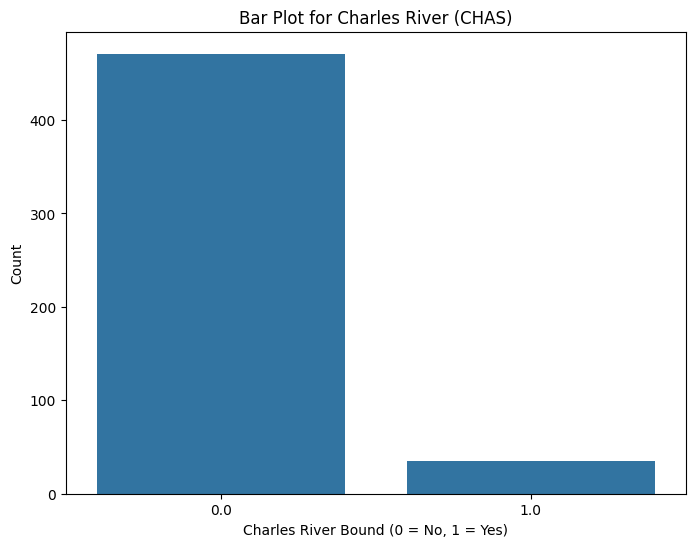

In [5]:
pyplot.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Bar Plot for Charles River (CHAS)')
pyplot.xlabel('Charles River Bound (0 = No, 1 = Yes)')
pyplot.ylabel('Count')
pyplot.show()

### 2.3. Boxplot of MEDV vs AGE (Discretized AGE variable)

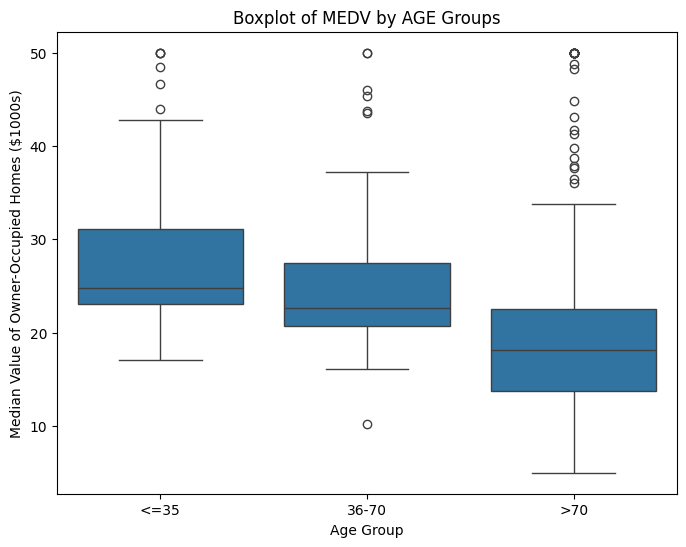

In [6]:
# Discretizing AGE into 3 categories
bins = [0, 35, 70, 100]
labels = ['<=35', '36-70', '>70']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

pyplot.figure(figsize=(8, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
pyplot.title('Boxplot of MEDV by AGE Groups')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value of Owner-Occupied Homes ($1000s)')
pyplot.show()

### 2.4. Scatter Plot of NOX vs INDUS (Nitric Oxides vs Non-Retail Business Acres)

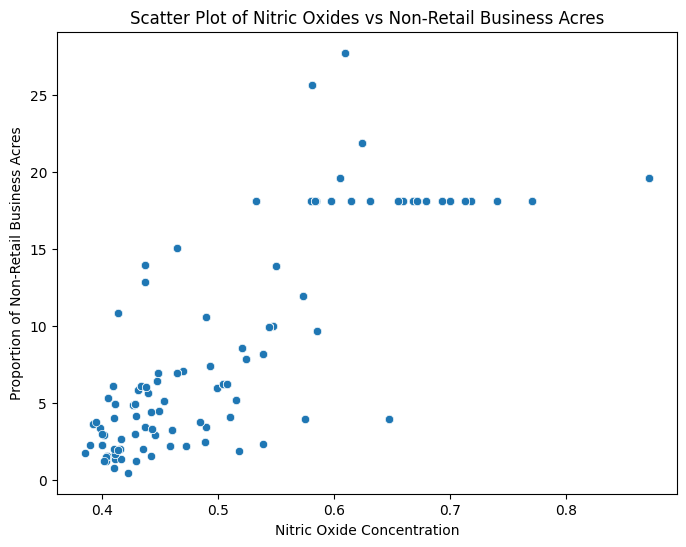

In [7]:
pyplot.figure(figsize=(8, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title('Scatter Plot of Nitric Oxides vs Non-Retail Business Acres')
pyplot.xlabel('Nitric Oxide Concentration')
pyplot.ylabel('Proportion of Non-Retail Business Acres')
pyplot.show()

### 2.5. Histogram of Pupil-Teacher Ratio (PTRATIO)

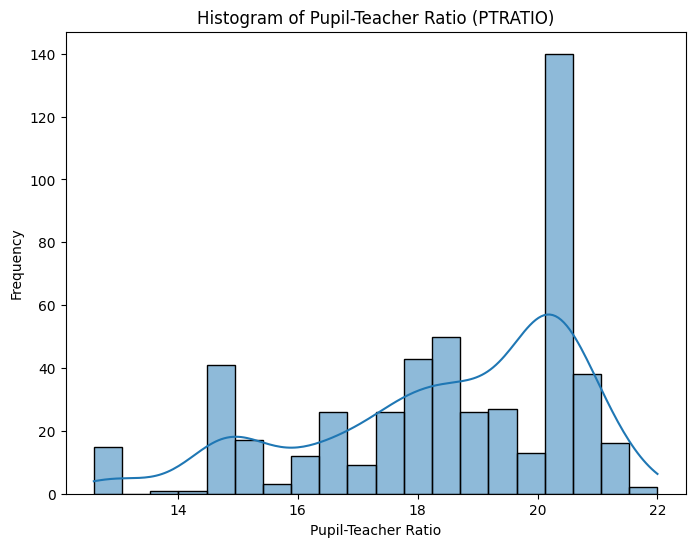

In [8]:
pyplot.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
pyplot.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

# Task 3: Answering Statistical Questions

### 3.1 Is there a significant difference in the median value of houses bounded by the Charles River?

In [9]:
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = scipy.stats.ttest_ind(chas_1, chas_0)
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05


### 3.2 Is there a difference in median values based on the proportion of owner-occupied units built before 1940?

In [10]:
# One-way ANOVA
model = ols('MEDV ~ C(AGE_group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                    sum_sq     df         F        PR(>F)
C(AGE_group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN


### 3.3 Is there a relationship between Nitric Oxide Concentrations and Non-Retail Business Acres?

In [11]:
correlation = boston_df['NOX'].corr(boston_df['INDUS'])
print(f'Correlation coefficient: {correlation}')


Correlation coefficient: 0.763651446920914


### 3.4 Impact of Weighted Distance on Median Home Value (MEDV)

In [12]:
model = ols('MEDV ~ DIS', data=boston_df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        21:15:52   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0